In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data = input_data.read_data_sets('data/',one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
x = tf.placeholder(dtype=tf.float32,shape = [None,784],name = "input")
y = tf.placeholder(dtype=tf.float32,shape = [None,10],name = "result")
para = {
    "W1":tf.Variable(tf.random_normal([784,256],mean=0.0,stddev=1/np.sqrt(784)),name = "W1"),
    "B1":tf.Variable(tf.zeros([256],name = "B1")),
    "W2":tf.Variable(tf.random_normal([256,128],mean=0.0,stddev=1/np.sqrt(256)),name = "W2"),
    "B2":tf.Variable(tf.zeros([128],name = "B2")),
    "W3":tf.Variable(tf.random_normal([128,10],mean=0.0,stddev=1/np.sqrt(128)),name = "W3"),
    "B3":tf.Variable(tf.zeros([10],name = "B3"))
}

In [4]:
lay_1 = tf.matmul(x,para["W1"])+para["B1"]
lay_1_out = tf.nn.sigmoid(lay_1)
lay_2 = tf.matmul(lay_1_out,para["W2"])+para["B2"]
lay_2_out = tf.nn.sigmoid(lay_2)
lay_3 = tf.matmul(lay_2_out,para["W3"])+para["B3"]
pred = tf.nn.softmax(lay_3)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
opti = tf.train.GradientDescentOptimizer(0.2).minimize(cost)
result = tf.equal(tf.arg_max(pred,1),tf.arg_max(y,1))
accu = tf.reduce_mean(tf.cast(result,tf.float32))

Instructions for updating:
Use `argmax` instead


In [5]:
saver = tf.train.Saver(max_to_keep = 2)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_size = 100
    epoch = 100
    inters = data.train.num_examples//batch_size
    for e in range(epoch):
        for inter in range(inters):
            train_x,train_y = data.train.next_batch(batch_size)
            _,cost1 = sess.run([opti,cost],feed_dict = {x:train_x,y:train_y})
        accuracy_test = sess.run(accu,feed_dict={x:data.test.images,y:data.test.labels})
        accuracy_train = sess.run(accu,feed_dict={x:train_x,y:train_y})
        saver.save(sess,"save/mnist.ckpt",global_step = e)
        print("inter:{0},accuracy_test:{1},accuracy_train:{2},cost:{3}".format(e,accuracy_test,accuracy_train,cost1))

inter:0,accuracy_test:0.20350000262260437,accuracy_train:0.20999999344348907,cost:2.2718966007232666
inter:1,accuracy_test:0.38199999928474426,accuracy_train:0.4300000071525574,cost:2.1125729084014893
inter:2,accuracy_test:0.4812999963760376,accuracy_train:0.5099999904632568,cost:1.9940376281738281
inter:3,accuracy_test:0.6297000050544739,accuracy_train:0.6100000143051147,cost:1.9078561067581177
inter:4,accuracy_test:0.6615999937057495,accuracy_train:0.6399999856948853,cost:1.86088228225708
inter:5,accuracy_test:0.6705999970436096,accuracy_train:0.699999988079071,cost:1.7665170431137085
inter:6,accuracy_test:0.6744999885559082,accuracy_train:0.7200000286102295,cost:1.7451844215393066
inter:7,accuracy_test:0.7184000015258789,accuracy_train:0.7400000095367432,cost:1.7454317808151245
inter:8,accuracy_test:0.7407000064849854,accuracy_train:0.7200000286102295,cost:1.7590793371200562
inter:9,accuracy_test:0.8162000179290771,accuracy_train:0.800000011920929,cost:1.6892820596694946
inter:10,ac

inter:83,accuracy_test:0.9553999900817871,accuracy_train:0.9700000286102295,cost:1.4908589124679565
inter:84,accuracy_test:0.9553999900817871,accuracy_train:0.9399999976158142,cost:1.5205268859863281
inter:85,accuracy_test:0.9563000202178955,accuracy_train:0.9800000190734863,cost:1.4854393005371094
inter:86,accuracy_test:0.9562000036239624,accuracy_train:0.9700000286102295,cost:1.4961990118026733
inter:87,accuracy_test:0.9560999870300293,accuracy_train:0.9200000166893005,cost:1.5399580001831055
inter:88,accuracy_test:0.9564999938011169,accuracy_train:0.9700000286102295,cost:1.4910436868667603
inter:89,accuracy_test:0.9574000239372253,accuracy_train:0.9599999785423279,cost:1.5091930627822876
inter:90,accuracy_test:0.9577000141143799,accuracy_train:0.9399999976158142,cost:1.528169870376587
inter:91,accuracy_test:0.9573000073432922,accuracy_train:0.9800000190734863,cost:1.4933178424835205
inter:92,accuracy_test:0.9577000141143799,accuracy_train:0.9900000095367432,cost:1.4714692831039429
i

INFO:tensorflow:Restoring parameters from save/mnist.ckpt-99
真实值为[7]预测值为[7]


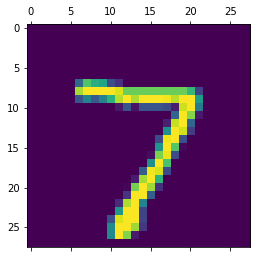

真实值为[2]预测值为[2]


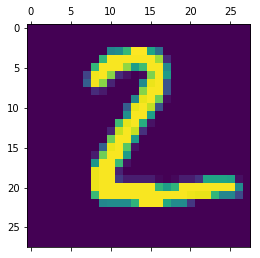

真实值为[1]预测值为[1]


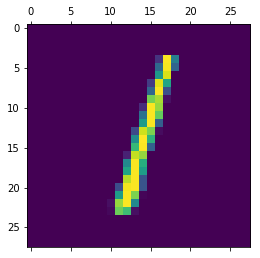

真实值为[0]预测值为[0]


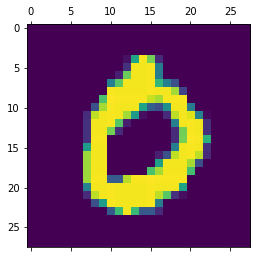

真实值为[4]预测值为[4]


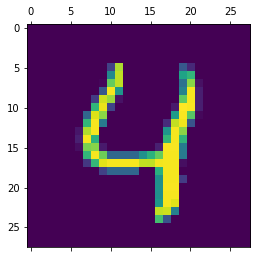

真实值为[1]预测值为[1]


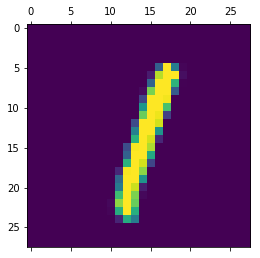

真实值为[4]预测值为[4]


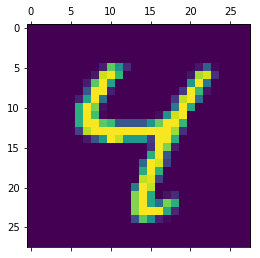

真实值为[9]预测值为[9]


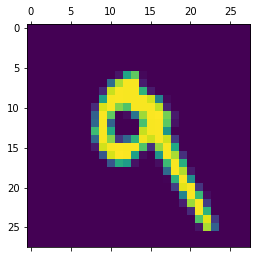

真实值为[5]预测值为[6]


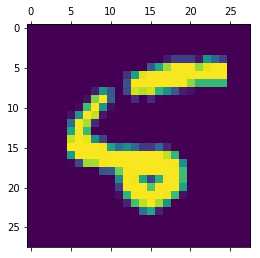

真实值为[9]预测值为[9]


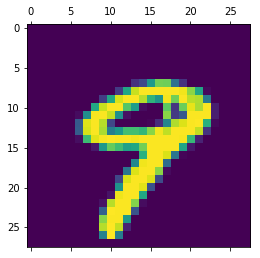

In [8]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,"save/mnist.ckpt-99")
    for i in range(10):
        test_image = data.test.images[i]
        test_image = np.reshape(test_image,[1,784])
        test_label = data.test.labels[i]
        test_label = np.reshape(test_label,[1,10])
        pred1 = sess.run(pred,feed_dict={x:test_image})
        position_pred = tf.arg_max(pred1,1)
        position_true = tf.arg_max(test_label,1)
        image = np.reshape(test_image,(28,28))
        print("真实值为{0}预测值为{1}".format(position_true.eval(),position_pred.eval()))
        plt.matshow(image)
        plt.show()

In [6]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
print_tensors_in_checkpoint_file("save/mnist.ckpt-99",None,True)

tensor_name:  Variable
[ 6.32414892e-02 -7.74034262e-02 -4.85556312e-02  9.31345075e-02
  2.04261038e-02 -1.17375188e-01 -1.42213760e-03  2.72181761e-02
 -9.46704447e-02 -5.23958504e-02 -6.34171367e-02  3.54341650e-03
 -1.94154847e-02 -1.92647316e-02 -5.20817526e-02 -1.80032279e-04
 -3.56589183e-02  7.46541619e-02 -1.78603586e-02  9.68083665e-02
 -3.36481892e-02  2.43276451e-03  5.56132477e-03 -2.63980962e-02
 -7.73905441e-02 -5.84203638e-02  4.88789715e-02 -6.88434243e-02
 -1.19304799e-01 -5.06241918e-02 -3.34248357e-02 -1.45361526e-02
  7.76318368e-03 -1.29713893e-01  5.56989834e-02 -9.33881551e-02
  3.02413292e-02  2.21517205e-01  9.22332704e-03 -3.29935737e-02
  7.80349672e-02 -1.65988103e-01 -1.29033223e-01  1.68467462e-02
 -7.30492622e-02 -3.31881307e-02 -2.97549330e-02 -1.38019100e-01
 -6.32659122e-02  7.63002858e-02  5.24513014e-02  2.04158742e-02
 -5.34091368e-02  1.02135852e-01 -5.56975342e-02 -1.25477258e-02
 -7.41133690e-02  1.03960454e-01 -2.13784520e-02  5.19641340e-02
 -